In [1]:
import pandas as pd # Importação das bibiliotecas que serão utilizadas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline

In [21]:
dados_soja = pd.read_csv('../input/dados-exportao-de-soja-20152019/exportacao_soja_15_19.csv')

In [4]:
dados_sojag = dados_soja.groupby(['CO_ANO','CO_MES']) # Dados de Soja agrupados por ano e mes
dados_sojags = dados_sojag.sum() # Dados de Soja agrupados anteriormente, somados
dados_sojags.reset_index(inplace=True) # Dados de Soma anteriormente agrupados retornando para coluna
dados_sojags['CO_ANO'] = dados_sojags['CO_ANO'].astype(str) # Conversão em String para juntar os campos de Ano e Mês para converter em data posteriormente
dados_sojags['CO_MES'] = dados_sojags['CO_MES'].astype(str)
dados_sojags['DATA'] = dados_sojags['CO_MES'] + '/' + dados_sojags['CO_ANO'] # Junção das Strings Ano e Mês para converter
dados_sojags['DATA'] = pd.to_datetime(dados_sojags['DATA'],format='%m/%Y') # Conversão dos dados em string para data

In [5]:
bs = pd.read_csv('../input/dados-exportao-de-soja-20152019/soybean-prices-historical-chart-data.csv') # Importação dos dados históricos do preço do Bushel em U$ disponível em https://www.macrotrends.net/2531/soybean-prices-historical-chart-data
bs['date'] = pd.to_datetime(bs['date'],format='%Y-%m-%d') # Conversão para trabalhar em formato de data
bs['Day'] = bs['date'].apply(lambda time: time.day) # Divisão da data em três campos (dia, mês e ano), pois os dados de exportação possui somente o mês e ano
bs['Month'] = bs['date'].apply(lambda time: time.month) 
bs['Year'] = bs['date'].apply(lambda time: time.year)
bs = bs.dropna() # Remoção das linhas sem dados (dias futuros), o dataset está completo
bsg = bs.groupby(['Year','Month']) # Dados de Soja agrupados por ano e mes
bsgm = bsg.mean() # Dados de Bushel agrupados anteriormente, por média
bsgm.reset_index(inplace=True) # Dados de Média anteriormente agrupados retornando para coluna
bsgm = bsgm[bsgm['Year']>2014] # Seleção somente dos dados a partir de 2015 para visualização
bsgm['Year'] = bsgm['Year'].astype(str) # Conversão em String para juntar os campos de Ano e Mês para converter em data posteriormente
bsgm['Month'] = bsgm['Month'].astype(str)
bsgm['Data'] = bsgm['Month'] + '/' + bsgm['Year'] # Junção das Strings Ano e Mês para converter
bsgm['Data'] = pd.to_datetime(bsgm['Data'],format='%m/%Y') # Conversão dos dados em string para data

In [6]:
dl = pd.read_csv('../input/dados-exportao-de-soja-20152019/Dolar.csv') # Importação dos dados históricos do valor do Dólar em R$ disponível em https://ycharts.com/
dl = dl.dropna() # Eliminação das possíveis linhas sem valor
divisao = dl['Data_Mvto'].str.split('/') # Divisão dos campos em Dia, Mes e Ano pois nos demais dados trabalhamos desta forma
dia = divisao.str.get(0) # Indicação da separação dos dados 
mes = divisao.str.get(1)
ano = divisao.str.get(2)
dl['dia'] = dia # Inserindo dados Indicados, nas colunas corretas
dl['mes'] = mes
dl['ano'] = ano.astype(int)
dlg = dl.groupby(['ano','mes']) # Dados agrupados por ano e mes conforme demais dados
dlgs = dlg.mean() # Média aplicada nos dados agrupados
dlgs.reset_index(inplace=True) # Média de dados retornando para coluna
dlgs['ano'] = dlgs['ano'].astype(str) # Conversão em String para juntar os campos de Ano e Mês para converter em data posteriormente
dlgs['mes'] = dlgs['mes'].astype(str)
dlgs['data'] = dlgs['mes'] + '/' + dlgs['ano'] # Junção das Strings Ano e Mês para converter
dlgs['data'] = pd.to_datetime(dlgs['data'],format='%m/%Y') # Conversão dos dados em string para data
dlgs['ano'] = dlgs['ano'].astype(int)
dlgs['ano'] = dlgs[dlgs['ano']>2014] # Seleção somente dos dados a partir de 2015 para visualização

In [7]:
dlgs.rename(columns = {'data':'DATA'}, inplace = True) # Alteração dos nomes das colunas para juntar em uma só posteriormente
dlgs.rename(columns = {'Valor':'DOLAR'}, inplace = True) 
dgls = dlgs.drop('ano',axis=1) # Exclusão das colunas que foram utilizadas para formar a data 
dgls = dlgs.drop('mes',axis=1)
bsgm = bsgm.drop('Year',axis=1)
bsgm = bsgm.drop('Month',axis=1)
bsgm = bsgm.drop('Day',axis=1)
bsgm.rename(columns = {'Data':'DATA'}, inplace = True)  # Alteração dos nomes das colunas para juntar em uma só posteriormente
bsgm.rename(columns = {'valor':'Bushel'}, inplace = True) 

In [8]:
merged = pd.merge(dados_sojags,dlgs,how='inner',on='DATA') # Junção das tabelas de Dados de Exportação de Soja, Dólar e Bushel pela coluna Data
merged = pd.merge(merged,bsgm,how='inner',on='DATA')
merged['BI_TON_LIQUIDO'] = merged['KG_LIQUIDO']/1000000000 # Conversão dos Dados de Kg para Bilhões de Toneladas para visualização

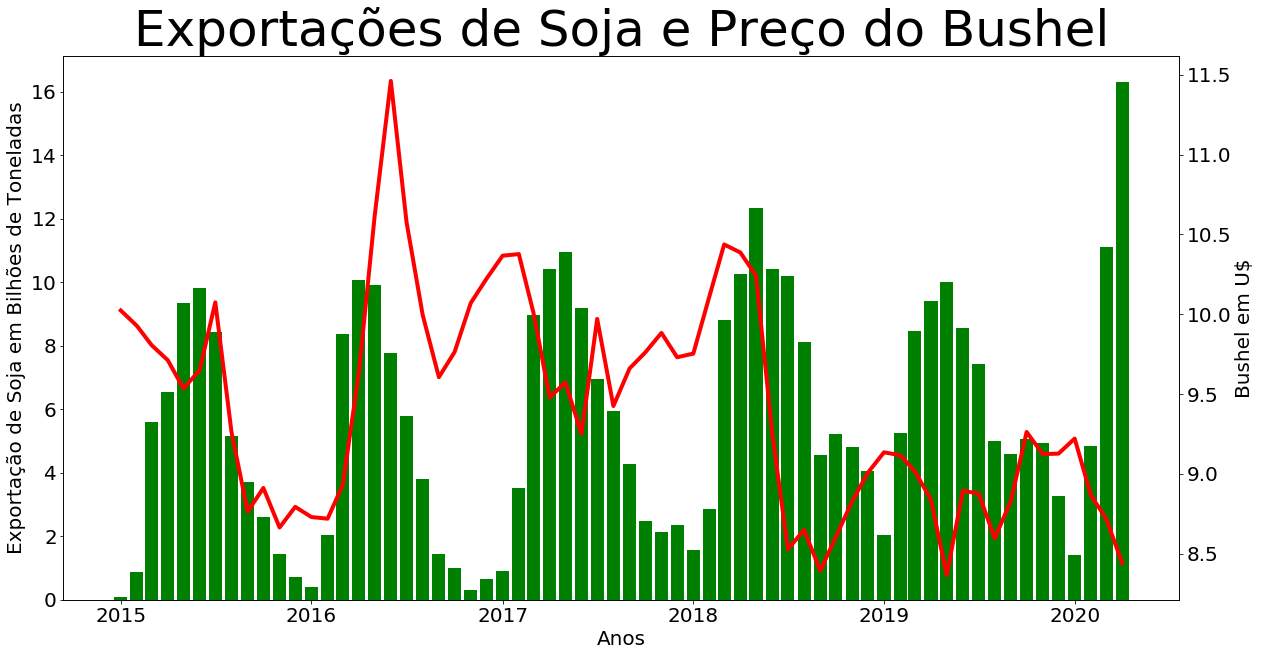

In [23]:
fig,ax = plt.subplots(figsize=(20,10))

plt.title('Exportações de Soja e Preço do Bushel',fontsize=50)
plt.xlabel('Anos',fontsize=20)
plt.ticklabel_format(style='plain',axis='y',useMathText=True,scilimits=(0,0))
plt.ylabel('Exportação de Soja em Bilhões de Toneladas',fontsize=20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
ax.bar(merged['DATA'],merged['BI_TON_LIQUIDO'],width=25,color='g')
ax2 = plt.twinx()
ax2.plot(merged['DATA'],merged['Bushel'],color='r',linewidth=4)
plt.ylabel('Bushel em U$',fontsize=20)
plt.yticks(fontsize = 20)
plt.savefig('Historico de Exportações.jpg',quality=95)
